# Time Series

#### 🎯 Learning Goals

1. Understand what a **time series** is. 
2. Understand **spurious regressions** in a time series context. 
3. Understand preliminary data preparations for getting you started with statistical modeling, i.e. carefully checking for
    + a trend,
    + a seasonal component, 
    + any apparent sharp changes in behavior

In [2]:
# Load our libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

# Use a nicer style for plots
plt.style.use("seaborn-v0_8-muted")

____
### Time Series, a first encounter

A time series records a variable of interest measured at different time points. We are interested in **discrete** time series, where time is discretely measured, i.e. time indices are a discrete set. 

#### ➡️ ✏️ Task 1

Go to this [website](https://archive.ics.uci.edu/datasets), select Time Series for Data Type. Browse the dataframes and pick one you are interested in. Load the data and plot the time series.

In [3]:
# Your solution

### Time Series - Caution

In many applications we are interested in some notion of causality, i.e. does an increase in one variabe translate into an increase of the other variable? When we look at correlation patterns e.g. in a linear model, this is ALWAYS problematic. For non-stationary time  series, the problem is, however, very obvious and quite mechanic.

Another example is Brownless (2019) who explores the question of what is the impact of hipsters on industrial production by running a model of the sort
 
 $$\text{industrial production}_t = \beta_0 + \beta_1 \text{popularity hipster} + \epsilon_t$$

 where $\text{popularity hipster}$ is measured as the monthly number of searches for the word hipster on Google in the US. He finds that

| | Estimate| Std. Error | t-ratio | p-value |
|--|--|--|--|--| 
| Intercept | 90.685 | 2.143 | 42 | <0.001 |
| Hipsters | 0.176 | 0.041 | 4.238 | <0.001|

![Hipsters Cause Growth](hipsters.jpg)

#### ➡️ ✏️ Task 2

Before walking you through more formalism, check out [this website](https://www.tylervigen.com/spurious-correlations) for examples of spurious correlations. Pick your favorite one and discuss it with your neighbor. Can you come up with some intuitive explanations for the spurious correlations?

#### ➡️ ✏️ Task 3

Consider the two time series below. Try to inspect carefully how they are generated.

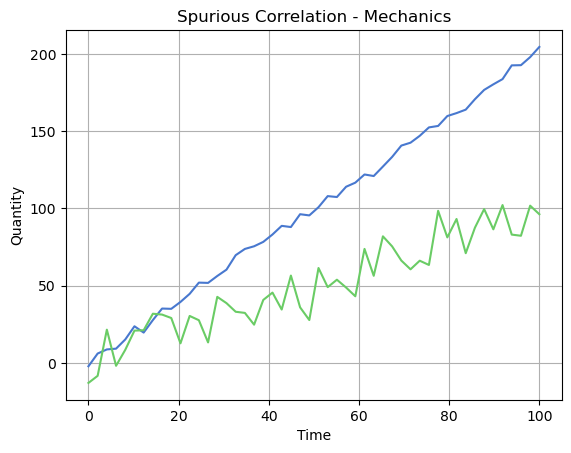

In [4]:
np.random.seed(123)
time = np.linspace(0,100)
#Series 1
y1 = 2*time + np.random.normal(0, 2, len(time))
#Series 2
y2 = 1*time +  np.random.normal(0, 10, len(time))

# Plotting the 2 time series

fig, ax = plt.subplots()
ax.plot(time, y1, label="A")
ax.plot(time, y2, label="B")
ax.set_xlabel("Time")
ax.set_ylabel("Quantity")
ax.set_title("Spurious Correlation - Mechanics")
ax.grid()

And now the scatterplot where the values of Series 2 are plotted on the x-axis and values for Series 1 on the y-axis.

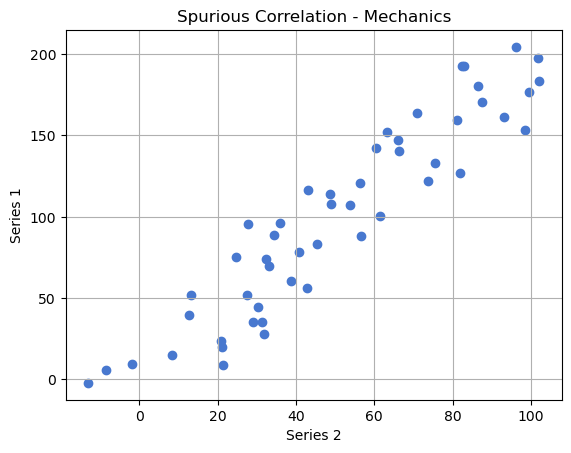

In [6]:
fig, ax = plt.subplots()
ax.scatter(y2, y1)
ax.set_xlabel("Series 2")
ax.set_ylabel("Series 1")
ax.set_title("Spurious Correlation - Mechanics")
ax.grid()

What is the reason both time series are correlated? Can you gather some intuition via the first plot? If not, look again at how the data was simulated. Do you get a sense now why?

______
### Time Series

Before working with time series data we have to understand and analyze the main features of the time series. Is there

1. a trend, 
2. a seasonal component, 
3. any apparent sharp changes in behavior, 
4. any outlying observation?

In this notebook we discuss how to eliminate trend and seasonal components to then fit a statistical model on the residual, for which one wishes to make probabilistic statements. Suppose our time series model (aka classical decomposition model) is governed by 

$$Y_t = m_t + s_t + \epsilon_t,$$

where $m_t$ is the trend component, $s_t$ the seasonal component and $\epsilon_t$ is some random noise, which is **stationary**. Is you are unsure what this means please ask questions! 

**Trend Elimination by Differencing**

Box and Jenkins (1976) suggested to repeatedly difference the data to eliminate the **non-stationary** parts of the time series.

Motivation if $m_t = c_0 + c_1 t$, then if we take a difference $Y_{t} - Y_{t-1}$, we get ignoring $s_t$ and $s_{t-1}$

$$Y_{t} - Y_{t-1} = c_1.$$

Make sure that you derive that on your tablet/paper and understand where it is coming from.

More general, let us define the backward shift operator $B$ as

$$BY_t = Y_{t-1},$$

and make sure you understand that it simply encodes taking 1-lag back observation of $Y_t$, that is $Y_{t-1}$.

Then, we eliminated the trend by computing $(1-B)Y_{t}$. Try to derive that on you tablet/paper.


#### ➡️ ✏️ Task 4

Eliminate the trend in series `y1` and `y2` by first-differencing, i.e. computing $(1-B)Y_t=Y_t- Y_{t-1}$. Generate a plot of the resulting series. Did you get rid of the trend? If yes, redraw the scatterplot. What do you observe? Do you now get a better intuition regarding spurious correlations in time series settings?


In [8]:
# Your solution

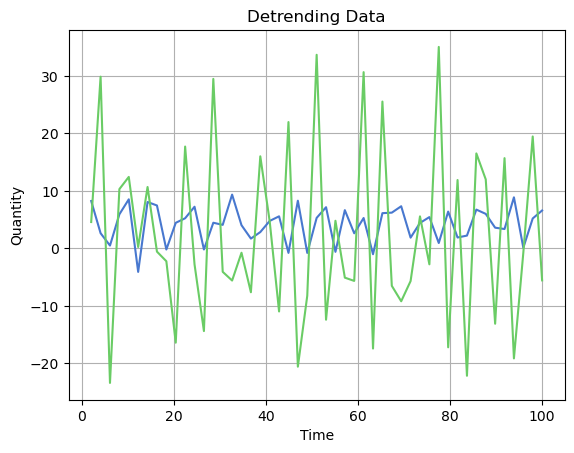

In [9]:
# TODO Delete
y1_diff = np.diff(y1)
y2_diff = np.diff(y2)

# Plotting the 2 time series

fig, ax = plt.subplots()
ax.plot(time[1:], y1_diff, label="A")
ax.plot(time[1:], y2_diff, label="B")
ax.set_xlabel("Time")
ax.set_ylabel("Quantity")
ax.set_title("Detrending Data")
ax.grid()

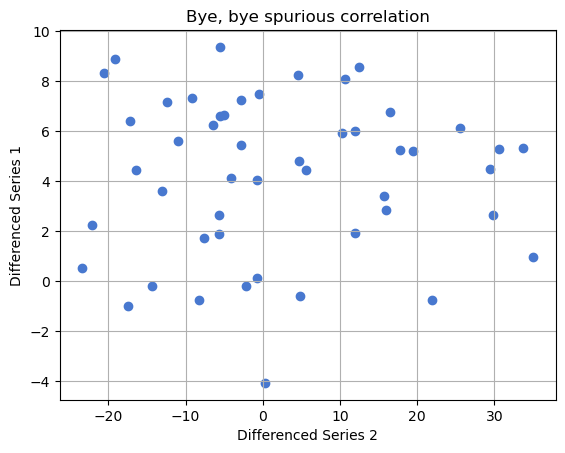

In [12]:
# TODO Delete
fig, ax = plt.subplots()
ax.scatter(y2_diff, y1_diff)
ax.set_xlabel("Differenced Series 2")
ax.set_ylabel("Differenced Series 1")
ax.set_title("Bye, bye spurious correlation")
ax.grid()

____
#### ➡️ ✏️ Task 5

Adjust the code such that the time series is non-stationary and conduct the Augmented Dickey Fuller. How does the test statistic and the associated p-value behave? How do you interpret the results?

In [29]:
np.random.seed(0)
ar_params = np.array([1, -1])  # AR(1) with phi=0.6
ma_params = np.array([1])        # No MA part
ar_process = ArmaProcess(ar=ar_params, ma=ma_params)
y_series = ar_process.generate_sample(nsample=1000) 

In [30]:
result = adfuller(y_series)
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])

ADF Statistic: -0.5437433594783736
p-value: 0.8831939389121154
Critical Values: {'1%': -3.4369127451400474, '5%': -2.864437475834273, '10%': -2.568312754566378}


____
#### ➡️ ✏️ Task 6

Suppose your data generating process is governed by $Y_t = s_t + \epsilon_t$, where the seasonal component repeats itself every $d$ periods. How would you eliminate the seasonal component using differencing?

___
#### 🤔 Pause and ponder - other methods

One possible alternative is seasonal-trend decomposition using locally estimated scatterplot smoothing to extract estimates of the three components of the time series model. The following code is taken from the FU Berlin and showcases decomposition of C02 concentration (column interpolated) into trend, seasonal part and the noise, $\epsilon_t$.

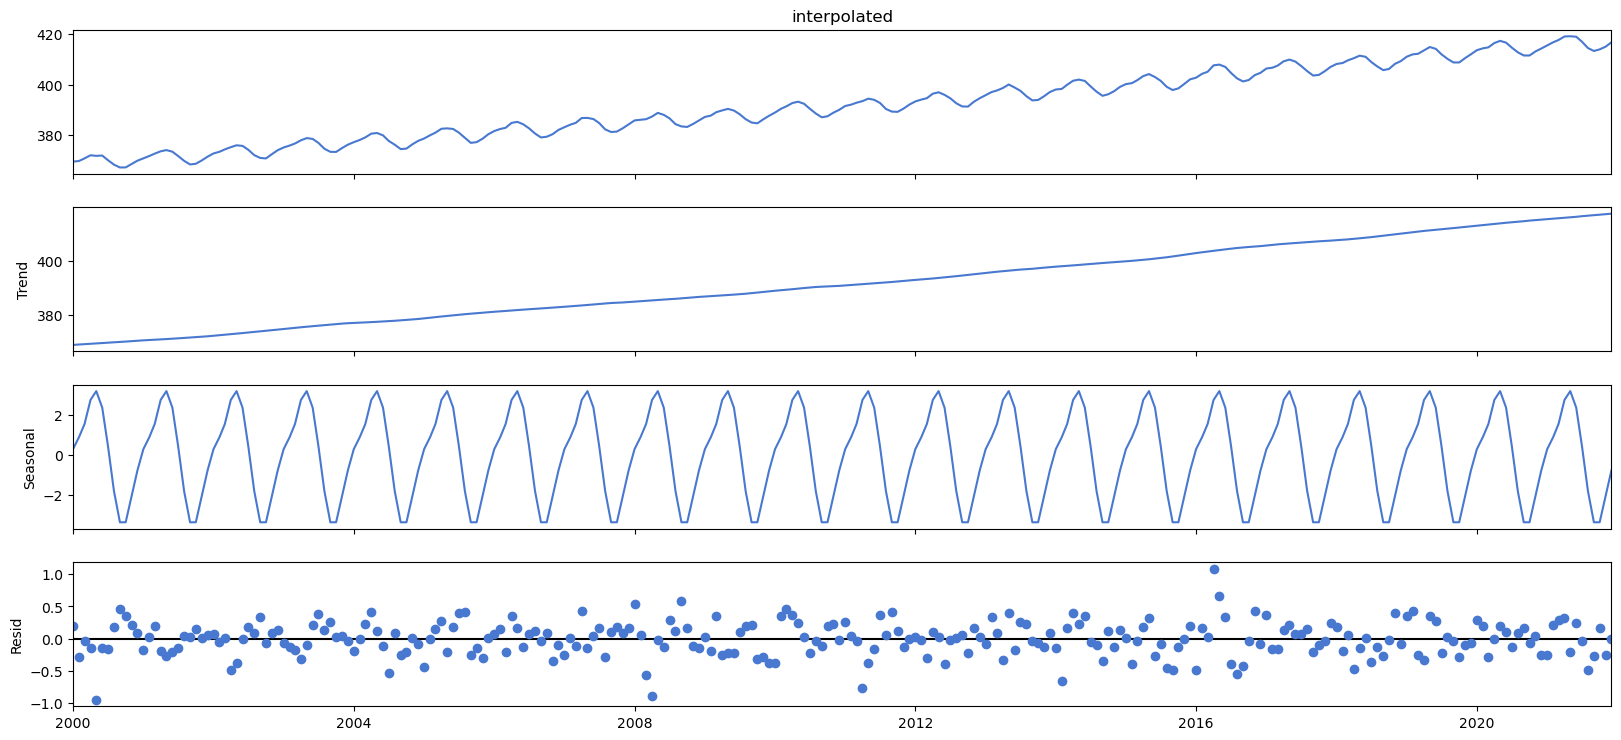

In [9]:
co2 = pd.read_json(
    "http://userpage.fu-berlin.de/soga/soga-py/300/307000_time_series/KeelingCurve.json"
)
co2 = co2.set_index("Date")  # set datetimeindex
co2 = co2["2000-01-01":"2021-12-31"]

# Time Series Decomposition
stl_co2 = seasonal_decompose(
    co2["interpolated"], model="additive", extrapolate_trend="freq"
)

fig = stl_co2.plot()
fig.set_size_inches((18, 8))  ##
plt.show()

____
#### ➡️ ✏️ Task 7

Inspect the trend component. Do you think differencing would also make sense? Do you think one difference would suffice?

### Sources

1. https://www.geo.fu-berlin.de/en/v/soga-py/Advanced-statistics/time-series-analysis/Seasonal-decompositon/STL-decomposition/index.html
2. Brownless (2019)

##